In [2]:
%cd ../../../..
%pwd

/Users/jbbutler129/Google Drive (butlerj@berkeley.edu)/Classes/215A/final_project/rule-vetting


'/Users/jbbutler129/Google Drive (butlerj@berkeley.edu)/Classes/215A/final_project/rule-vetting'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import rulevetting.api.viz as viz
from rulevetting.projects.tbi_pecarn.dataset import Dataset

outcome_def = 'outcome'  # output

/opt/anaconda3/lib/python3.8/site-packages/redis/connection.py:77: UserWarning: redis-py works best with hiredis. Please consider installing
  warnings.warn(msg)


## Loading the Data - Default Judgement Calls (Flatten Umbrella)

Note: this is with the default judgement calls, including flattening of the umbrella variables in feature extraction

In [4]:
df_train_1, df_tune_1, df_test_1 = Dataset().get_data()

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step8_missingOSI': True, 'step9_HEMA': 3, 'step10_cautiousUncl': True, 'step14_vomitDtls': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_cautiousUncl': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'remove_constVal': True}}


## Doing EDA on the Preprocessed Dataset (According to Default Judgment Calls)
## (note: only looking at the training data)

### First, let's just analyze relationships between the umbrella variables and the outcomes (to see what could be a good predictor)

So, we ignore: loss of consciousness length, seizure length, headache severity, the ams categories, the skull fracture categories, hematoma size, clavicle injury locations, neurological categories, and the OSI categories.

In [11]:
keys_to_keep = ['LOCSeparate',
 'Seiz',
 'ActNorm',
 'Vomit',
 'GCSEye',
 'GCSVerbal',
 'GCSMotor',
 'GCSTotal',
 'AMS',
 'SFxPalp',
 'FontBulg',
 'SFxBas',
 'Hema',
 'Clav',
 'NeuroD',
 'OSI',
 'AgeinYears',
 'Gender',
 'Race',
 'outcome',
 'High_impact_InjSev_1',
 'High_impact_InjSev_2',
 'High_impact_InjSev_3',
 'Amnesia_verb_0',
 'Amnesia_verb_1',
 'Amnesia_verb_91',
 'HA_verb_0',
 'HA_verb_1',
 'HA_verb_91']

In [12]:
umbrella_subset = df_train_1[keys_to_keep]

In [51]:
list(df_train_1.keys())

['LOCSeparate',
 'Seiz',
 'ActNorm',
 'Vomit',
 'GCSEye',
 'GCSVerbal',
 'GCSMotor',
 'GCSTotal',
 'AMS',
 'SFxPalp',
 'FontBulg',
 'SFxBas',
 'Hema',
 'Clav',
 'NeuroD',
 'OSI',
 'AgeinYears',
 'Gender',
 'Race',
 'outcome',
 'High_impact_InjSev_1',
 'High_impact_InjSev_2',
 'High_impact_InjSev_3',
 'Amnesia_verb_0',
 'Amnesia_verb_1',
 'Amnesia_verb_91',
 'LocLen_1',
 'LocLen_2',
 'LocLen_3',
 'LocLen_4',
 'LocLen_92',
 'SeizLen_1',
 'SeizLen_2',
 'SeizLen_3',
 'SeizLen_4',
 'SeizLen_92',
 'HA_verb_0',
 'HA_verb_1',
 'HA_verb_91',
 'HASeverity_1',
 'HASeverity_2',
 'HASeverity_3',
 'HASeverity_92',
 'AMSAgitated_0',
 'AMSAgitated_1',
 'AMSAgitated_92',
 'AMSSleep_0',
 'AMSSleep_1',
 'AMSSleep_92',
 'AMSSlow_0',
 'AMSSlow_1',
 'AMSSlow_92',
 'AMSRepeat_0',
 'AMSRepeat_1',
 'AMSRepeat_92',
 'AMSOth_0',
 'AMSOth_1',
 'AMSOth_92',
 'SFxPalpDepress_0',
 'SFxPalpDepress_1',
 'SFxPalpDepress_92',
 'SFxBasHem_0',
 'SFxBasHem_1',
 'SFxBasHem_92',
 'SFxBasOto_0',
 'SFxBasOto_1',
 'SFxBasOto_92

Text(0.5, 1.0, 'Correlations of Each Predictor with Outcome (ciTBI, Kuppermann definition)')

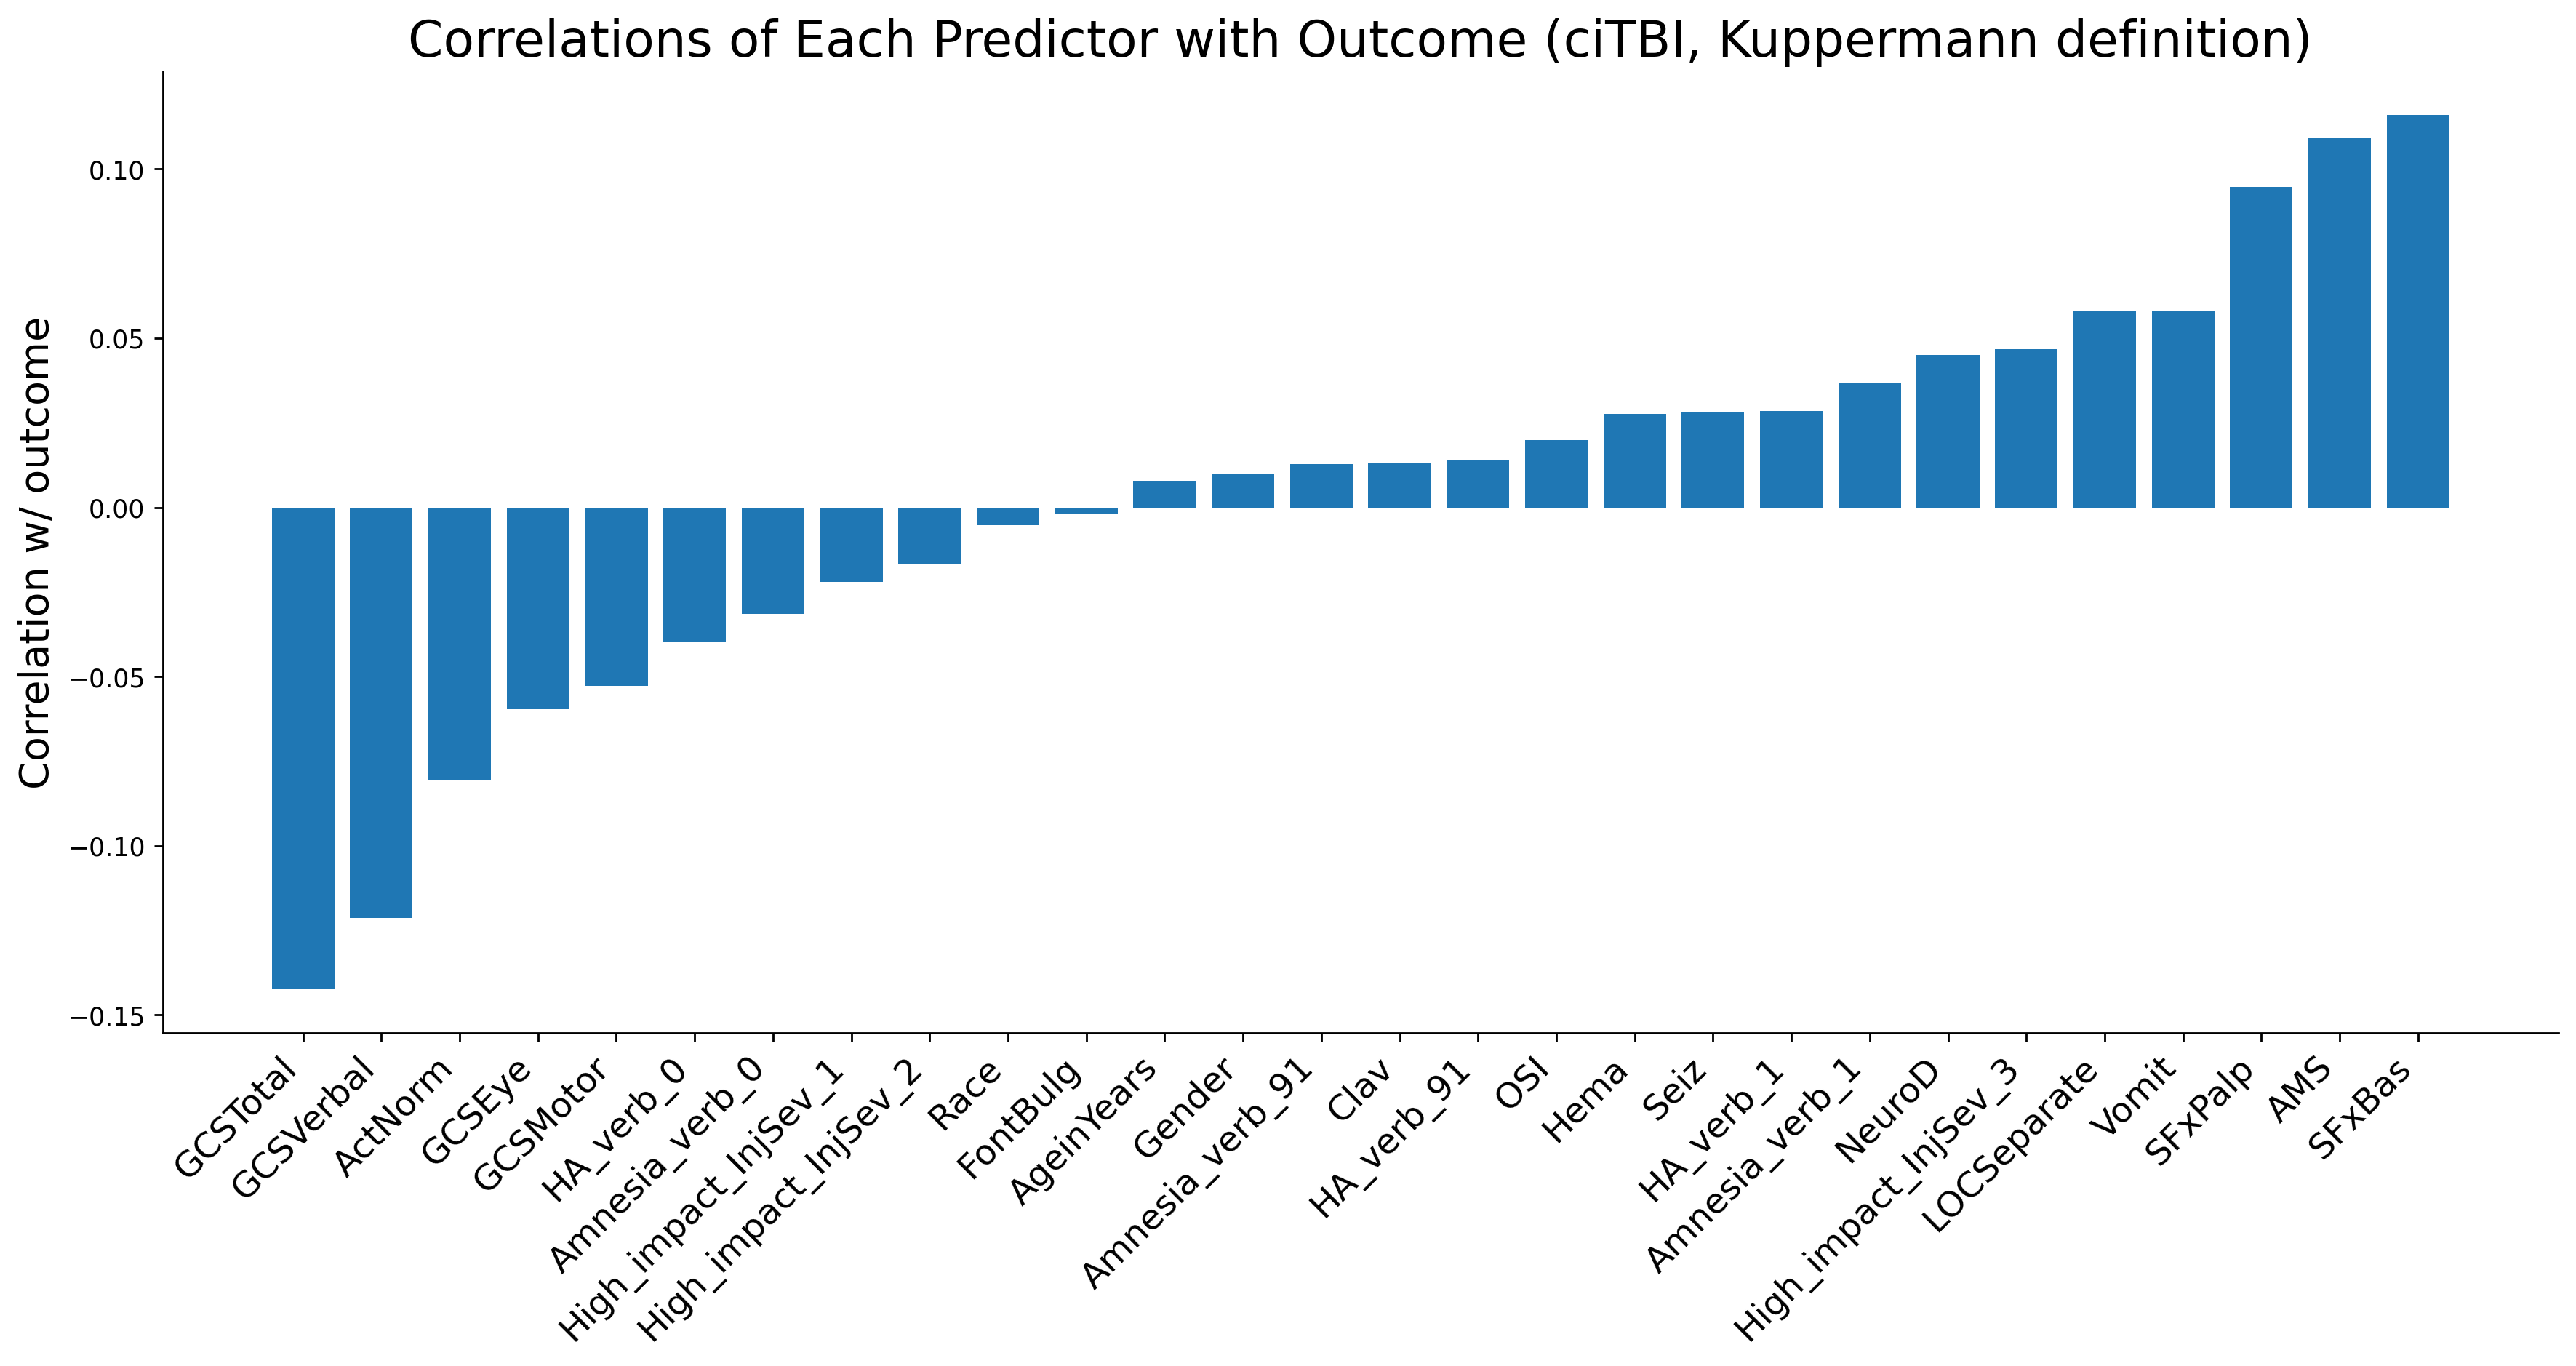

In [17]:
name = 'corr_outcomes.png'

corrs = umbrella_subset.corr()

plt.figure(dpi=250, figsize=(17, 7))
vals = corrs['outcome']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.bar(labs[:-1], vals[args][:-1])
plt.ylabel('Correlation w/ outcome', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation = 45, ha = 'right', fontsize = 14)
plt.title('Correlations of Each Predictor with Outcome (ciTBI, Kuppermann definition)', fontsize = 20)
#plt.savefig("rulevetting/projects/tbi_pecarn/notebooks/figs/" + name, dpi = 300)

Pretty reasonable! Things to note: 

1. importance of ActNorm in having a negative correlation with the outcome (we thought it was too subjective maybe, but actually pretty highly negatively correlated compared to other variables)

2. GCS verbal seems to have more correlation with the outcome than GCS Eye or GCS Motor (> 2 times the correlation)

3. Gender, Age, Race don't seem like good predictors of the outcome, so we probably don't to include in the classifier (we had talked about age being a possible predictor, but this seems to show otherwise)

Questions:

1. When selecting features for the classifiers, should we pick features that have some correlation outside a neighborhood of 0?

2. Should we analyze the umbrella/sub-feature combos at all, if the umbrella variable is already not super correlated with the outcome? Could argue that it doesn't matter since it doesn't matter overall, but could also argue that certain subcategories might be important relative to the others and could provide fine-grained info for a classification.



### Now, let's look at the umbrella variable/sub-variable combinations to see if any of these could be good predictors as well

In [47]:
# useful function for extracting the relevant columns for each umbrella-subcategory combo

def find_cols(col_name, df):
    
    keys = list(df.keys())
    col_name_keys = []
    
    for key in keys:
        if col_name in key and '92' not in key:
            col_name_keys.append(key)
            
    return(col_name_keys)

def subset_umbrella(df, col_name):
    
    cols = find_cols(col_name, df) + ['outcome']
    condition_subset = df[cols]
    condition_subset = condition_subset[condition_subset[col_name] == 1]
    condition_subset.drop(col_name, axis = 1, inplace = True)
    
    return(condition_subset)

def make_correlation_plot(df_subset):
    
    corrs = df_subset.corr()

    plt.figure(dpi=250, figsize=(17, 7))
    vals = corrs['outcome']
    args = np.argsort(vals)
    labs = vals.index.values[args]
    ax = plt.subplot(111)
    plt.bar(labs[:-1], vals[args][:-1])
    plt.ylabel('Correlation w/ outcome', fontsize = 16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xticks(rotation = 45, ha = 'right', fontsize = 14)
    plt.title('Correlations of Subvariables, Conditioning on True Umbrella', fontsize = 20)
    
    


#### AMS

Lets first look at AMS. So, of all the individuals with altered mental status, what is the correlation of the presence of the different features with the outcome?

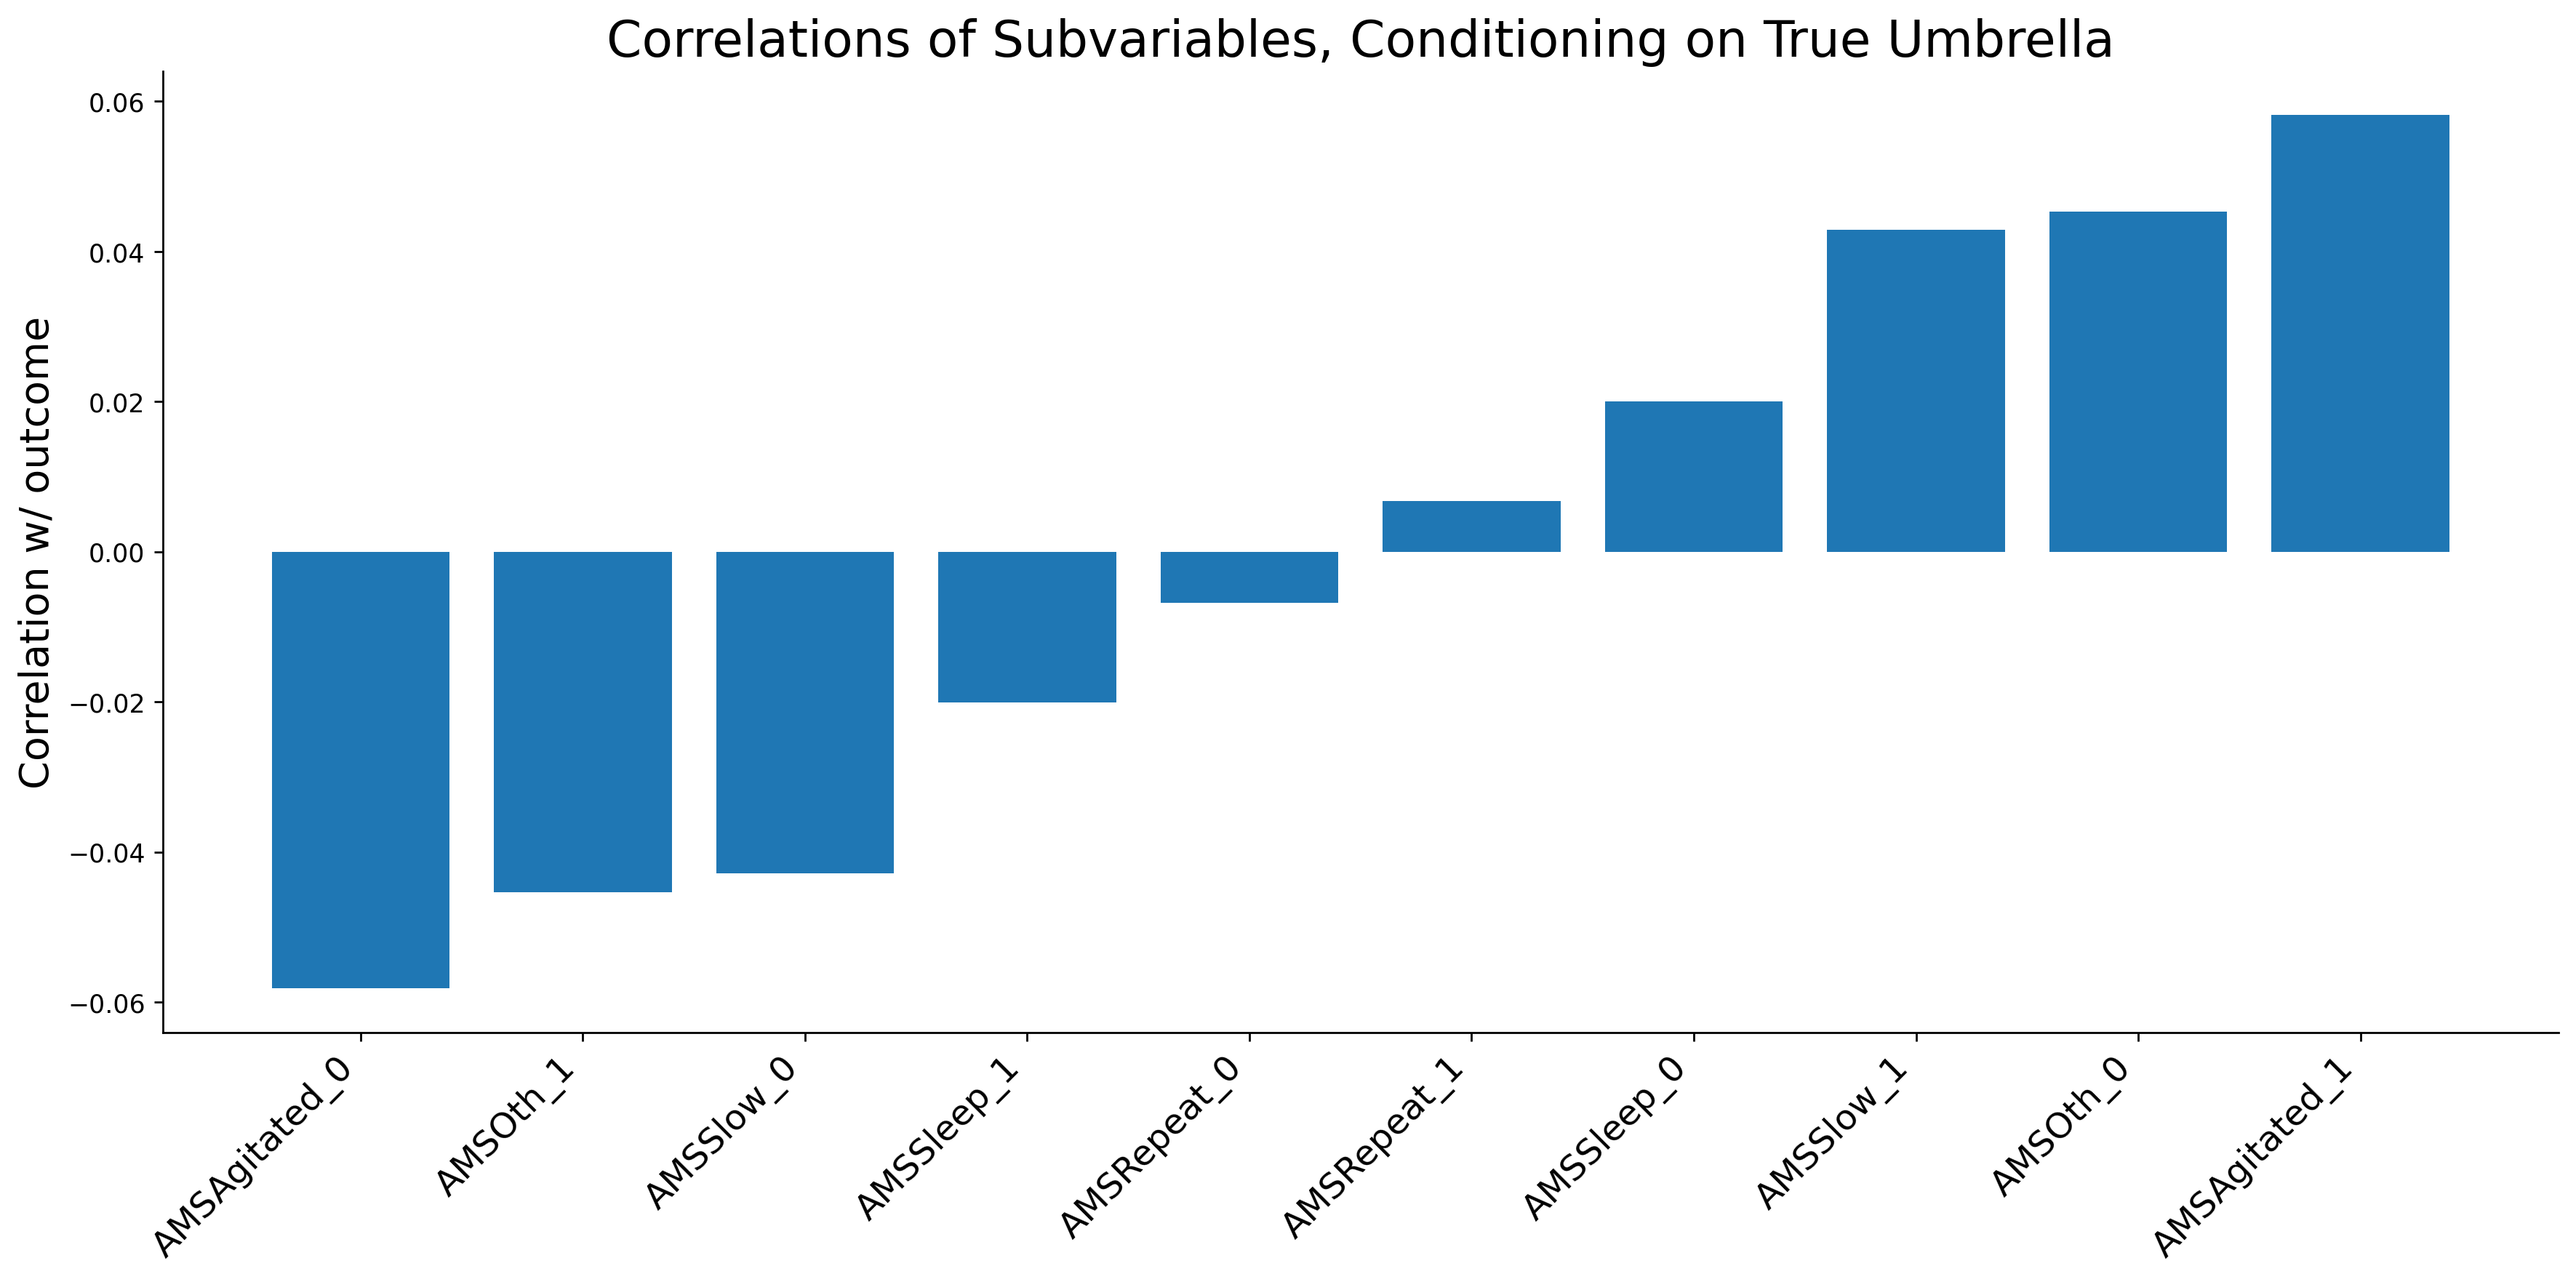

In [48]:
ams_condition_subset = subset_umbrella(df_train_1, 'AMS')
make_correlation_plot(ams_condition_subset)

Among individuals with altered mental status, it seems like certain criteria are more correlated with having a ciTBI. Like AMSAgitated_1 vs AMSSleep_1. So, this tells us that if you have altered mental status, it seems like being agitated as the reason might be more indicative of a ciTBI than being sleepy as the reason. This tells us that there might be a dependence of subcategory on whether or not you have a ciTBI. But 'other' being really high also shows that AMS has general importance. 

#### Clav

Next look at clavicle variables. So, of all the individuals with above the clavicle injuries, what is the correlation of the presence of the different features with the outcome?

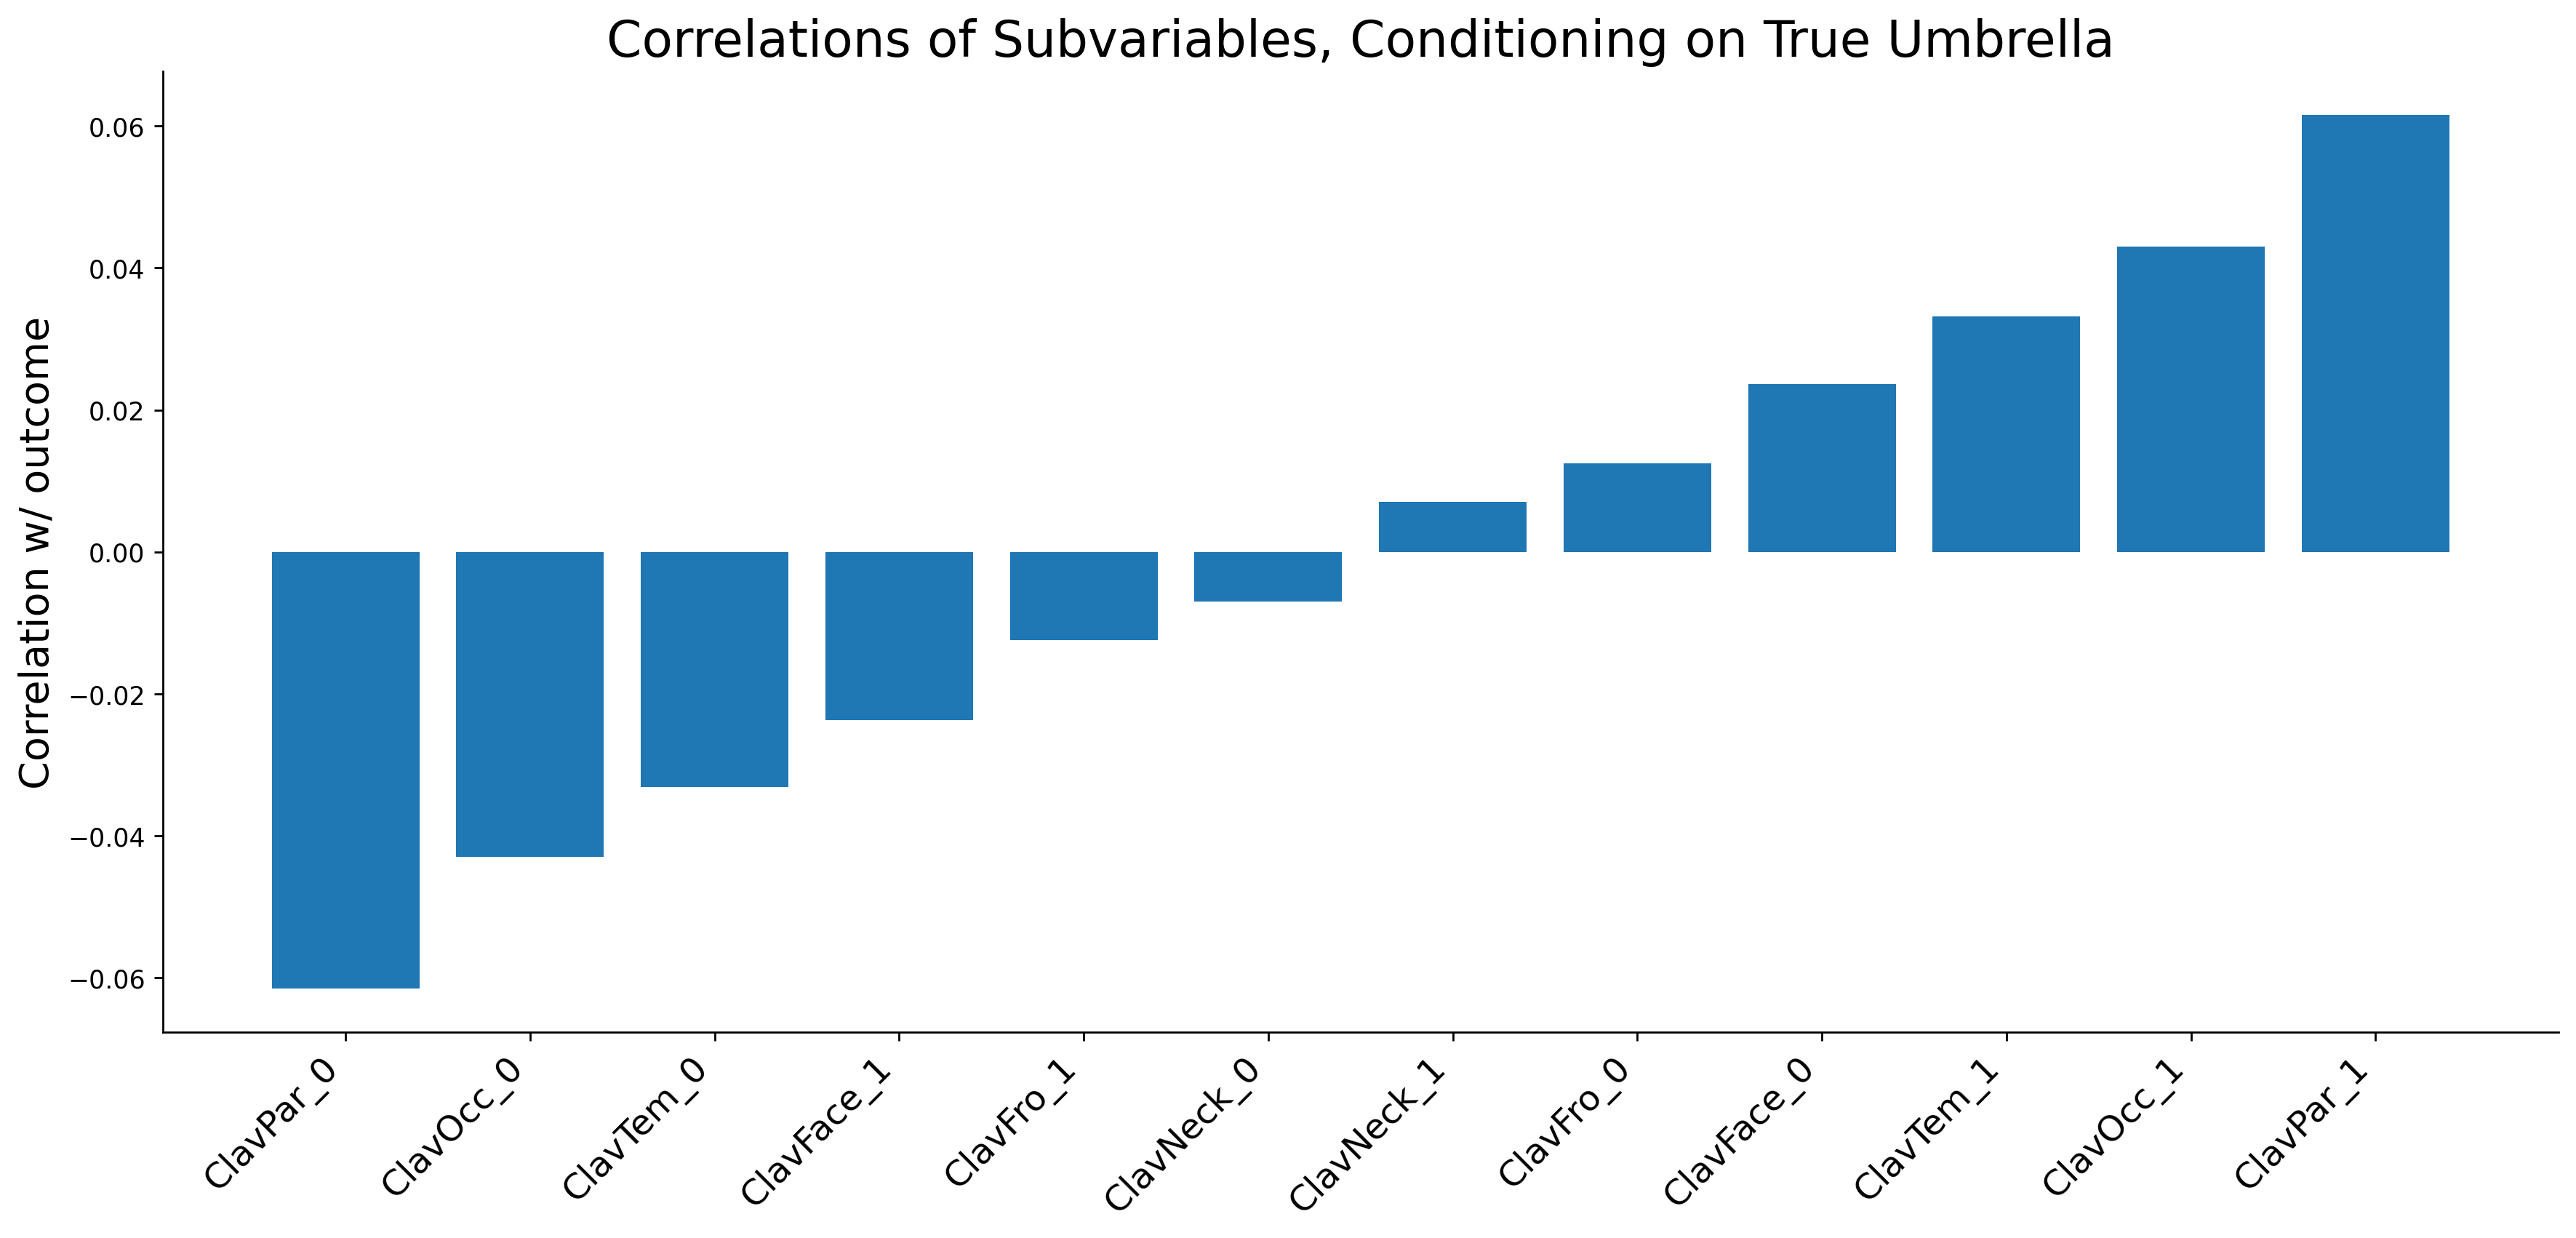

In [49]:
clav_condition_subset = subset_umbrella(df_train_1, 'Clav')
make_correlation_plot(clav_condition_subset)

#### SFxBas

Next look at basilar skull fracture variables. So, of all the individuals with above the basilar skull fracture injuries, what is the correlation of the presence of the different features with the outcome?

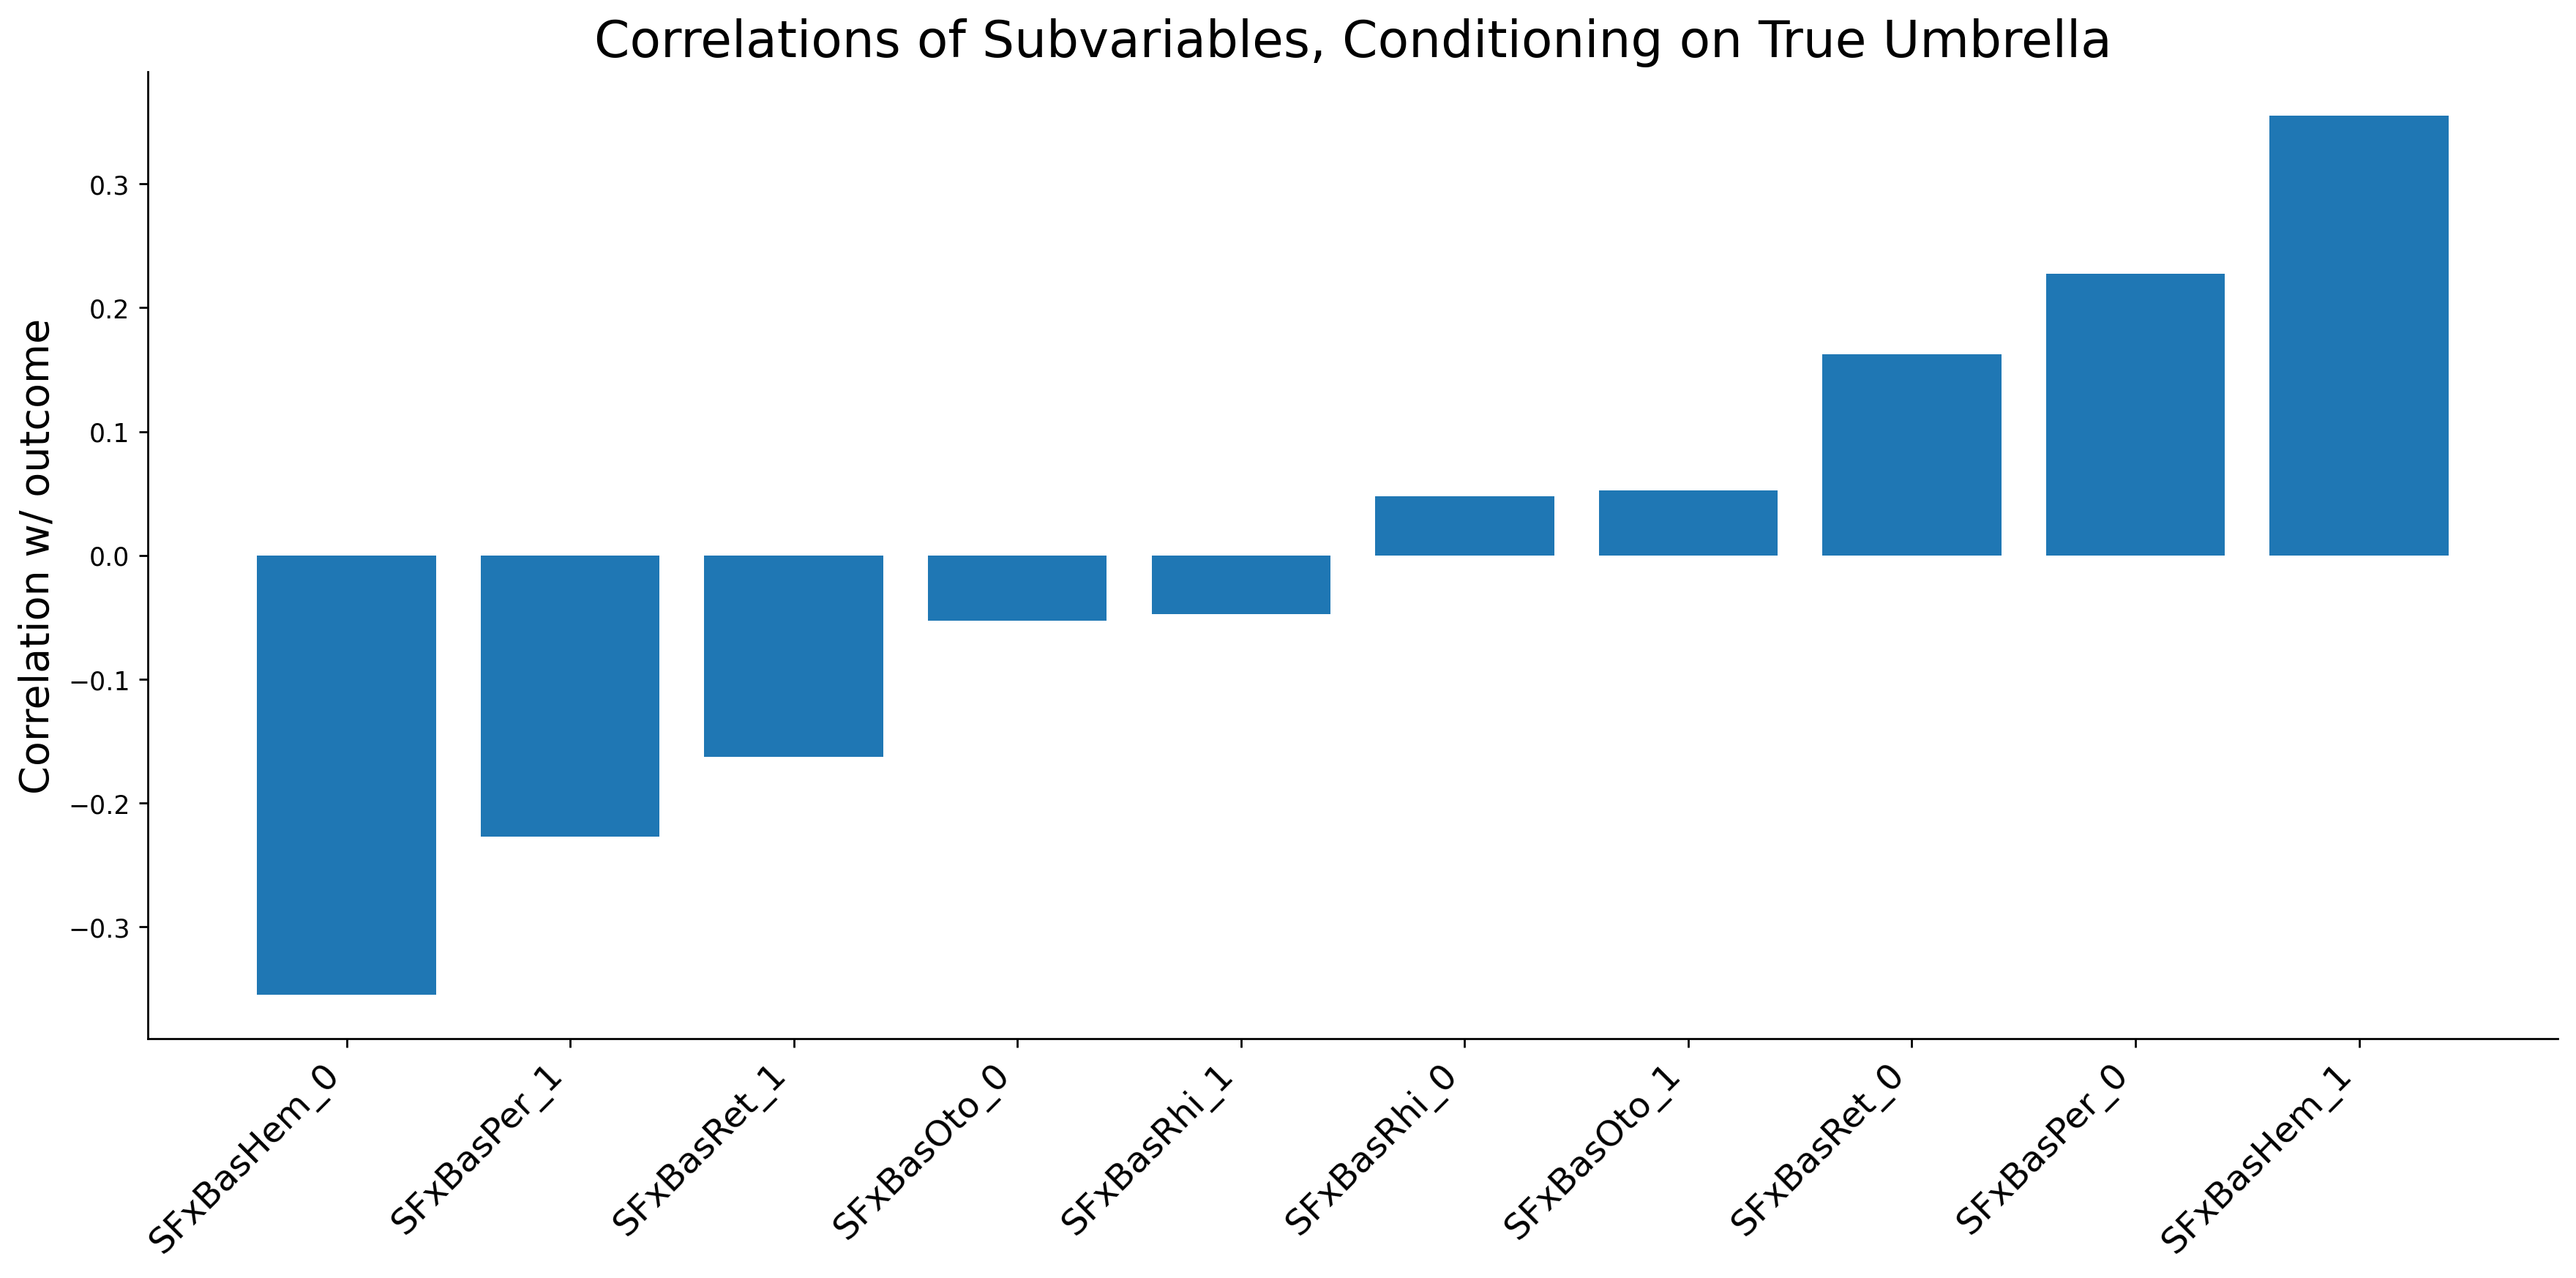

In [50]:
sfxbas_condition_subset = subset_umbrella(df_train_1, 'SFxBas')
make_correlation_plot(sfxbas_condition_subset)

Seems like the hem and per variables are particularly associated with the outcome (per is the racoon eyes stuff)

#### Neuro

Lets now look at the neuro subvariables

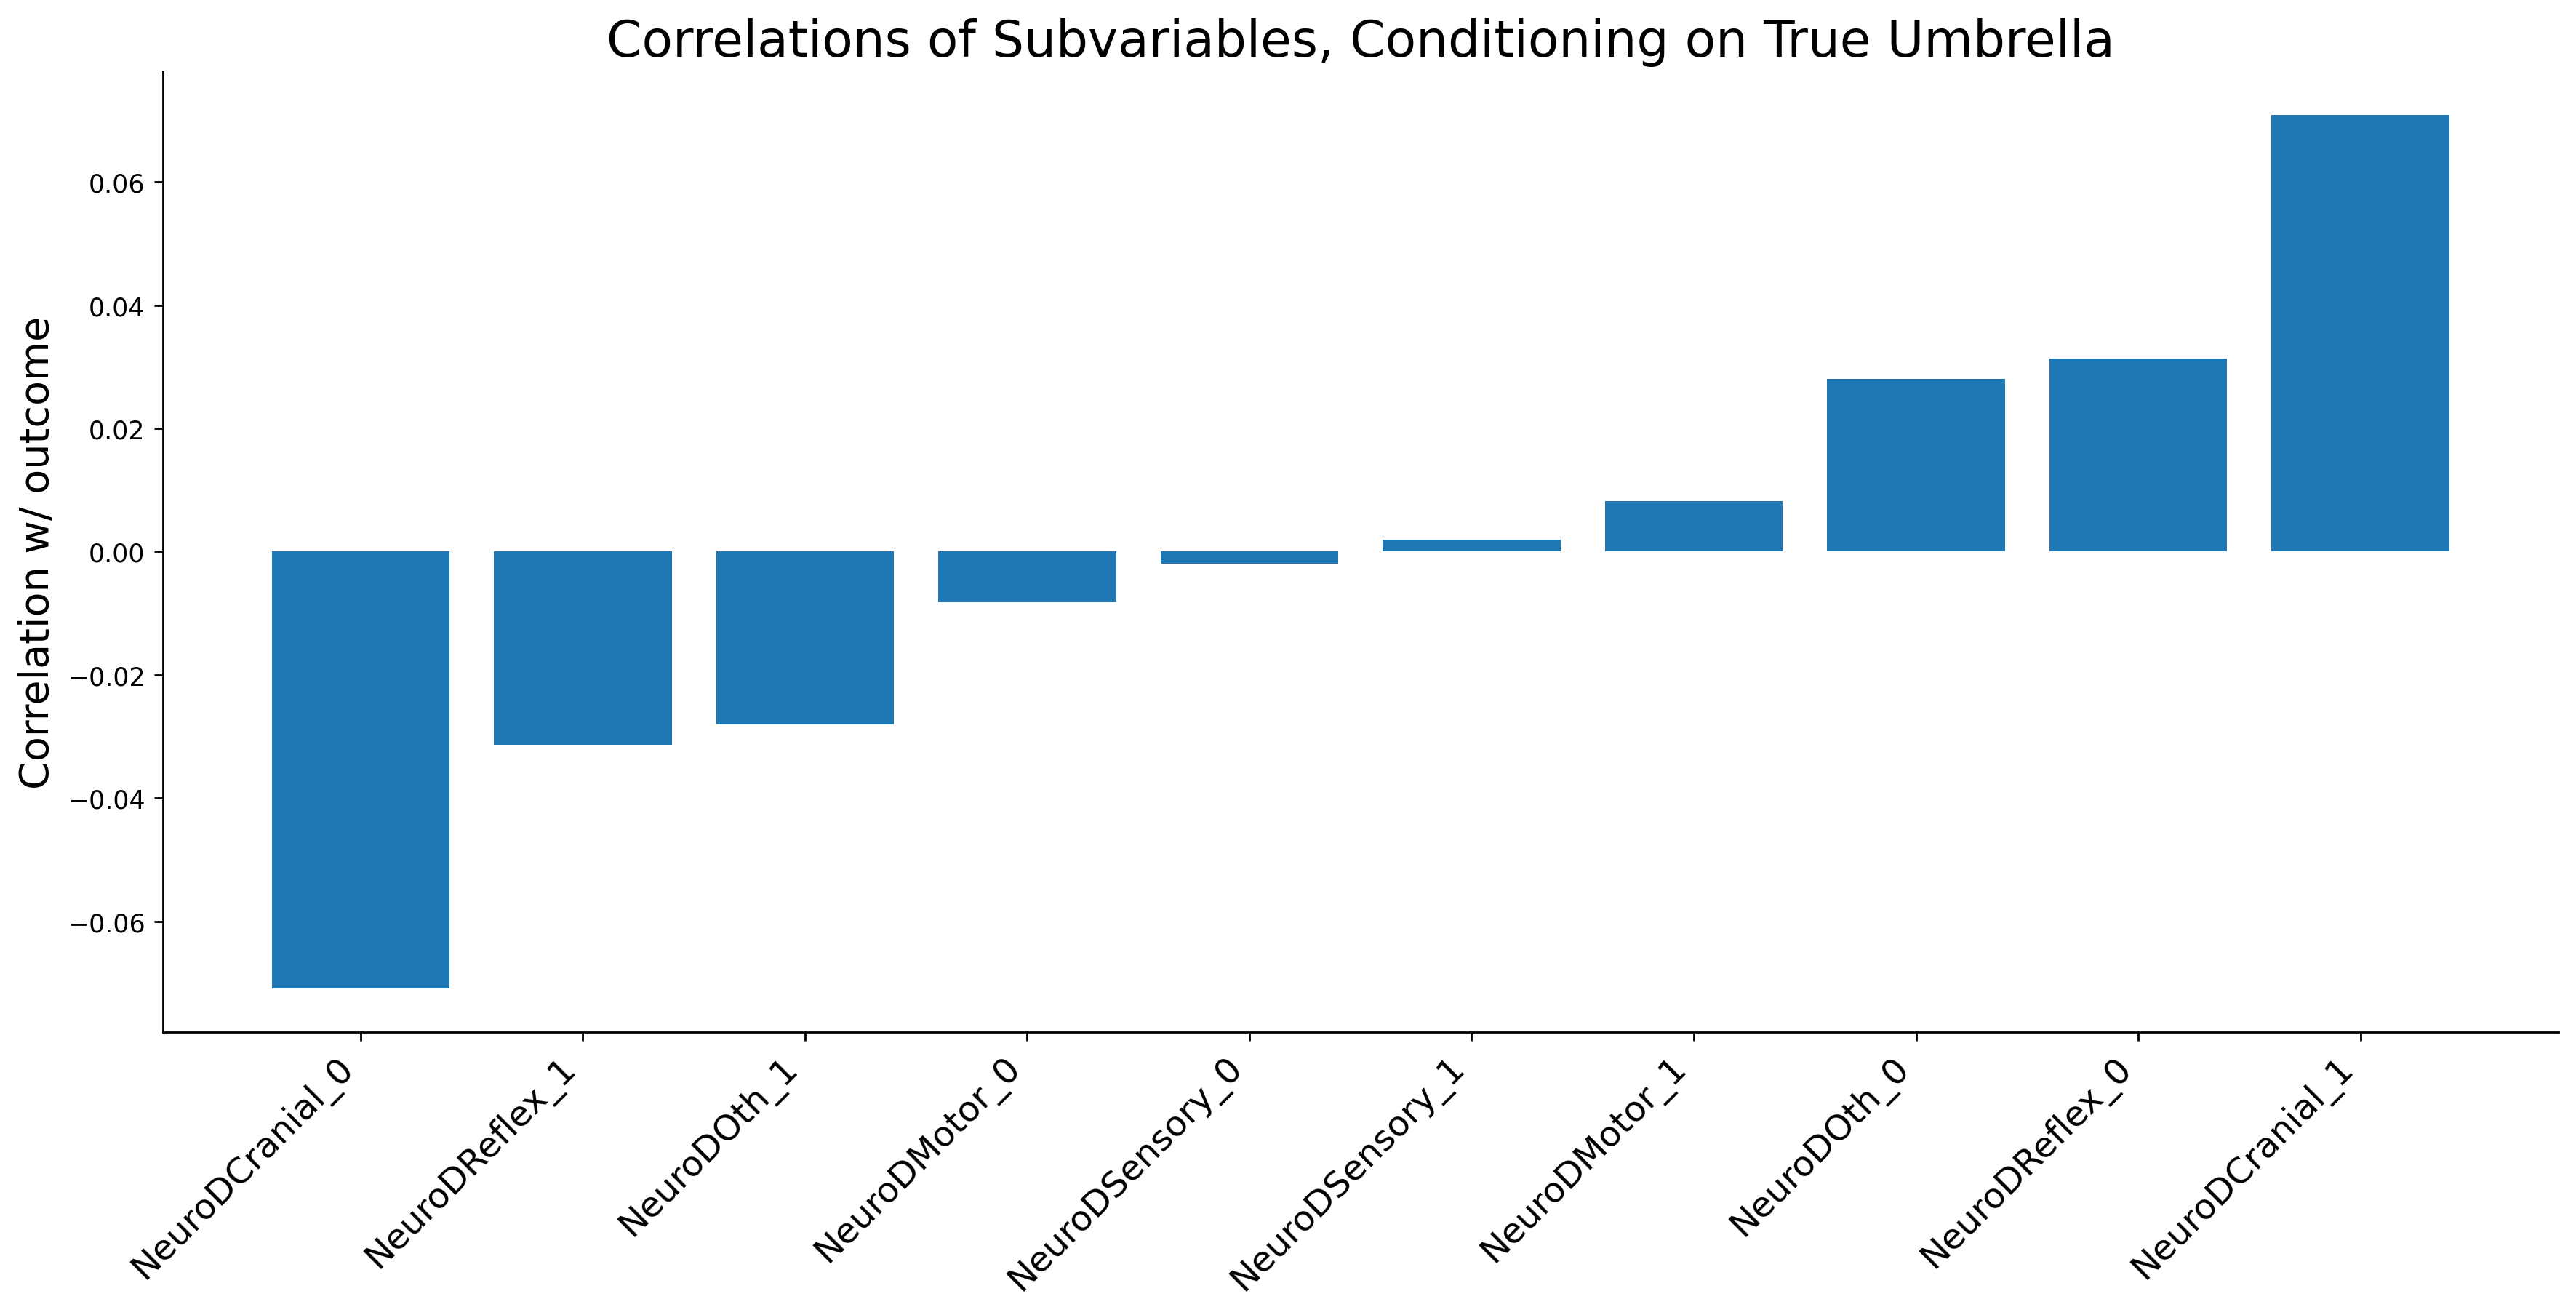

In [55]:
neuro_condition_subset = subset_umbrella(df_train_1, 'NeuroD')
make_correlation_plot(neuro_condition_subset)

Cranial nerves/pupil reflexivity seem super important, among individuals that have neurological deficits

## Loading the Data - Default Preprocess JCs, But No Flattening Umbrella (not sure how to implement this?)

In [ ]:
# load judgement calls dictionary
judgement_calls = Dataset().get_judgement_calls_dictionary()

In [4]:
# get the default judgement calls for preprocessing + no flattening of umbrella variables

judgement_calls2 = {}

judgement_calls2['clean_data'] = {}
judgement_calls2['preprocess_data'] = {'step1_injMech': False,
  'step5_missSubGCS': True,
  'step5_fake15GCS': True,
  'step5_fake14GCS': True,
  'step8_missingOSI': True,
  'step9_HEMA': 3,
  'step10_cautiousUncl': True,
  'step14_vomitDtls': False,
  'step15_HA': 2,
  'step15_HAStart': False,
  'step16_Seiz': 2,
  'step16_SeizOccur': False,
  'step17_cautiousUncl': True,
  'step19_Drugs': False,
  'step20_ActNormal': True}

judgement_calls2['extract_features'] = {'HEMA_umbrella': True,
  'SFxPalp_umbrella': True,
  'SFxBas_umbrella': True,
  'Clav_umbrella': True,
  'NeuroD_umbrella': True,
  'Vomit_umbrella': True,
  'HA_umbrella': True,
  'Seiz_umbrella': True,
  'LOC_umbrella': True,
  'remove_constVal': True}
        

In [ ]:
judgement_calls2 = {'step1_injMech': False,
  'step5_missSubGCS': True,
  'step5_fake15GCS': True,
  'step5_fake14GCS': True,
  'step8_missingOSI': True,
  'step9_HEMA': 3,
  'step10_cautiousUncl': True,
  'step14_vomitDtls': False,
  'step15_HA': 2,
  'step15_HAStart': False,
  'step16_Seiz': 2,
  'step16_SeizOccur': False,
  'step17_cautiousUncl': True,
  'step19_Drugs': False,
  'step20_ActNormal': True,
  'HEMA_umbrella': True,
  'SFxPalp_umbrella': True,
  'SFxBas_umbrella': True,
  'Clav_umbrella': True,
  'NeuroD_umbrella': True,
  'Vomit_umbrella': True,
  'HA_umbrella': True,
  'Seiz_umbrella': True,
  'LOC_umbrella': True,
  'remove_constVal': True}

In [5]:
# load the data with these new judgement calls
df_train_2, df_tune_2, df_test_2 = Dataset().get_data(**judgement_calls2)

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step8_missingOSI': True, 'step9_HEMA': 3, 'step10_cautiousUncl': True, 'step14_vomitDtls': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_cautiousUncl': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'remove_constVal': True}}


In [7]:
list(df_train_2.keys())

['LOCSeparate',
 'Seiz',
 'ActNorm',
 'Vomit',
 'GCSEye',
 'GCSVerbal',
 'GCSMotor',
 'GCSTotal',
 'AMS',
 'SFxPalp',
 'FontBulg',
 'SFxBas',
 'Hema',
 'Clav',
 'NeuroD',
 'OSI',
 'AgeinYears',
 'Gender',
 'Race',
 'outcome',
 'High_impact_InjSev_1',
 'High_impact_InjSev_2',
 'High_impact_InjSev_3',
 'Amnesia_verb_0',
 'Amnesia_verb_1',
 'Amnesia_verb_91',
 'LocLen_1',
 'LocLen_2',
 'LocLen_3',
 'LocLen_4',
 'LocLen_92',
 'SeizLen_1',
 'SeizLen_2',
 'SeizLen_3',
 'SeizLen_4',
 'SeizLen_92',
 'HA_verb_0',
 'HA_verb_1',
 'HA_verb_91',
 'HASeverity_1',
 'HASeverity_2',
 'HASeverity_3',
 'HASeverity_92',
 'AMSAgitated_0',
 'AMSAgitated_1',
 'AMSAgitated_92',
 'AMSSleep_0',
 'AMSSleep_1',
 'AMSSleep_92',
 'AMSSlow_0',
 'AMSSlow_1',
 'AMSSlow_92',
 'AMSRepeat_0',
 'AMSRepeat_1',
 'AMSRepeat_92',
 'AMSOth_0',
 'AMSOth_1',
 'AMSOth_92',
 'SFxPalpDepress_0',
 'SFxPalpDepress_1',
 'SFxPalpDepress_92',
 'SFxBasHem_0',
 'SFxBasHem_1',
 'SFxBasHem_92',
 'SFxBasOto_0',
 'SFxBasOto_1',
 'SFxBasOto_92

In [13]:
df_train_2['HospHeadPosCT'].unique()

KeyError: 'HospHeadPosCT'

-AMS missing from the extract features (should be binarized in a similar fashion I feel), also missing from the preprocessing